# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import 

### Problem Statement - To Predict People are Survived or Not Survived on Titanic Ship

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA

<Axes: xlabel='Survived', ylabel='count'>

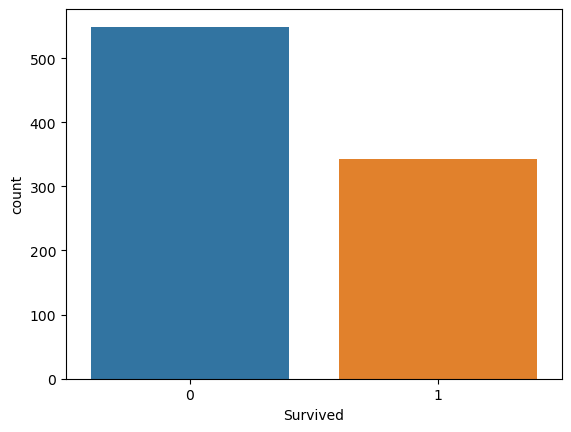

In [9]:
sns.countplot(x = 'Survived',data=df)

In [10]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<Axes: xlabel='Pclass', ylabel='count'>

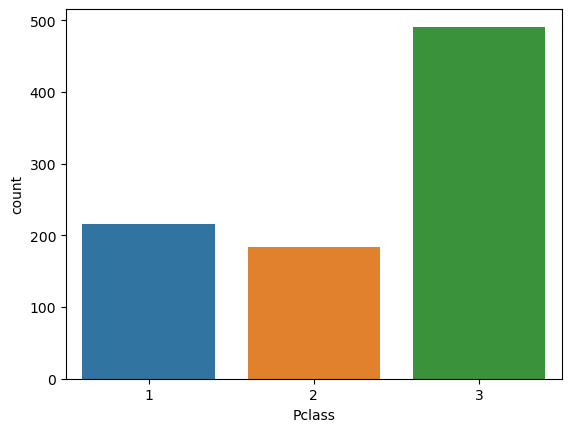

In [11]:
sns.countplot(x = 'Pclass', data=df)

In [12]:
# mat.countplot('Sex', data = df)

<Axes: xlabel='Age', ylabel='count'>

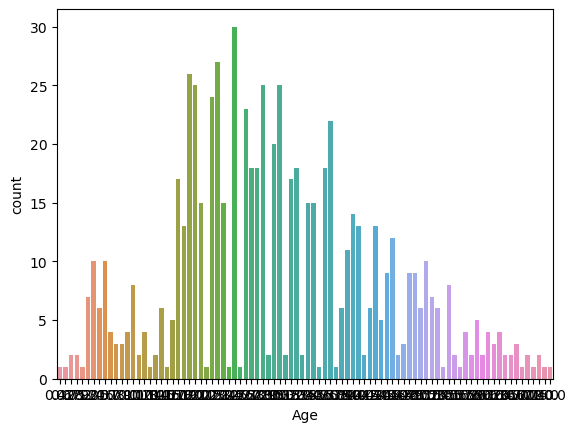

In [13]:
sns.countplot(x = 'Age',data=df)

<Axes: ylabel='Frequency'>

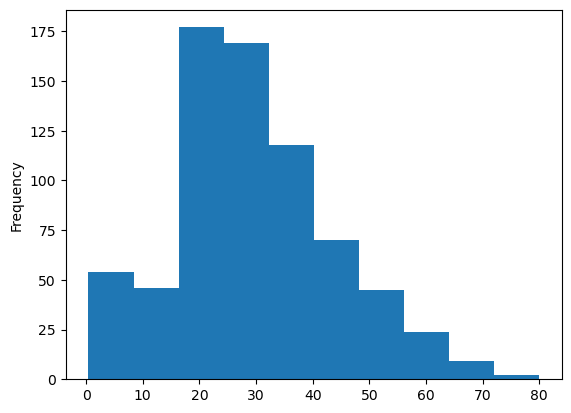

In [14]:
df['Age'].plot.hist()

<Axes: xlabel='Fare', ylabel='count'>

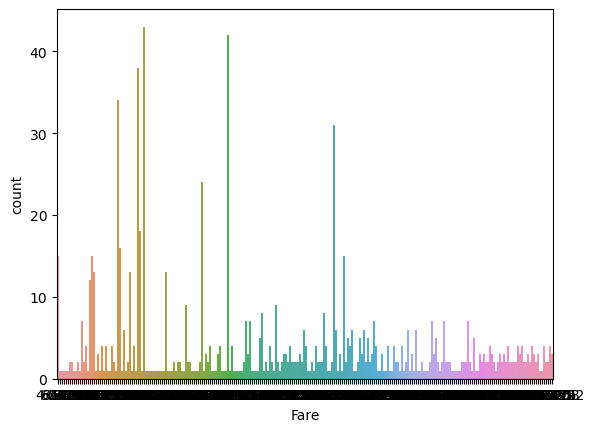

In [15]:
sns.countplot(x = 'Fare',data=df)

<Axes: ylabel='Frequency'>

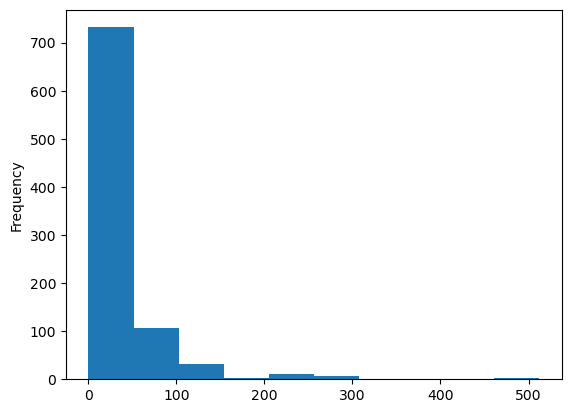

In [16]:
df['Fare'].plot.hist()

In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

1. Southampton
2. Cherbourg
3. Quenstown

<Axes: xlabel='Embarked', ylabel='count'>

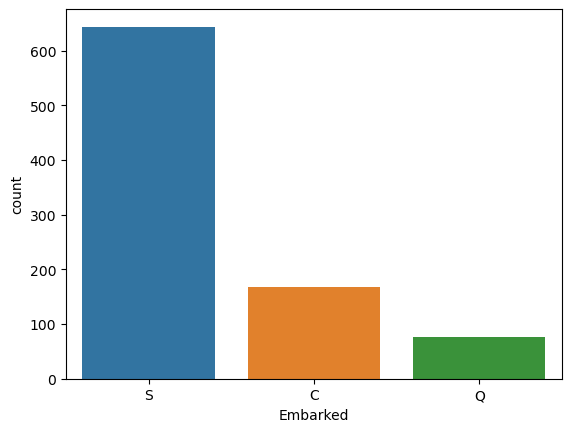

In [18]:
sns.countplot(x = 'Embarked',data=df)

<Axes: xlabel='Survived', ylabel='count'>

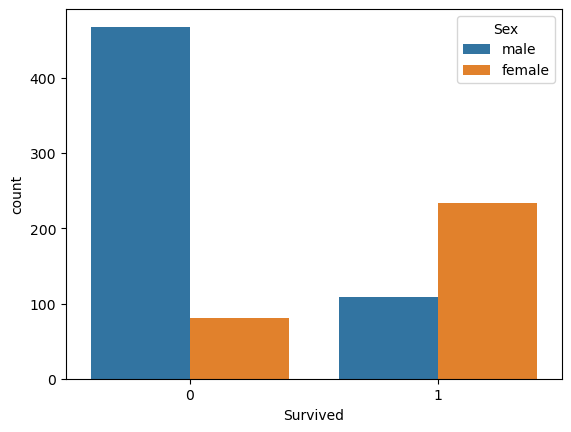

In [19]:
sns.countplot(x = 'Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

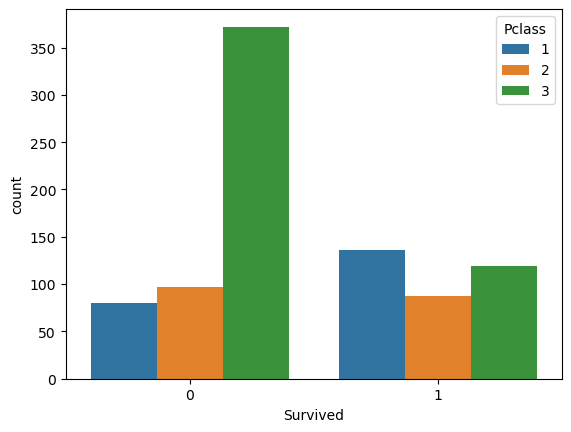

In [20]:
sns.countplot(x = 'Survived', hue='Pclass', data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

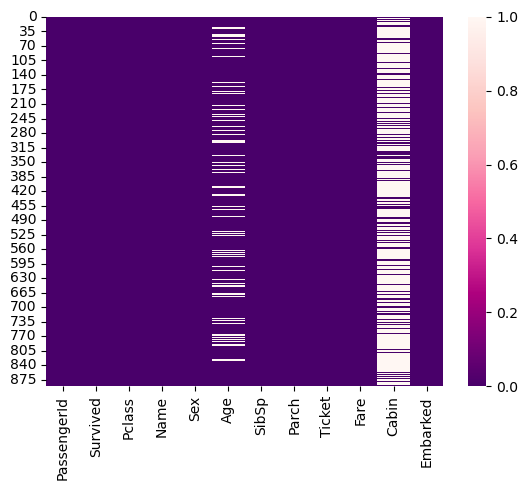

In [23]:
sns.heatmap(df.isnull(), cmap='RdPu_r')

In [24]:
df1 = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [25]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

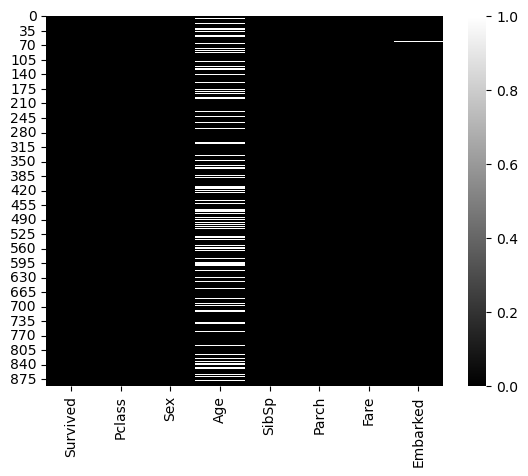

In [26]:
sns.heatmap(df1.isnull(), cmap='gist_yarg_r')

In [27]:
df1.dropna(inplace=True)

<Axes: >

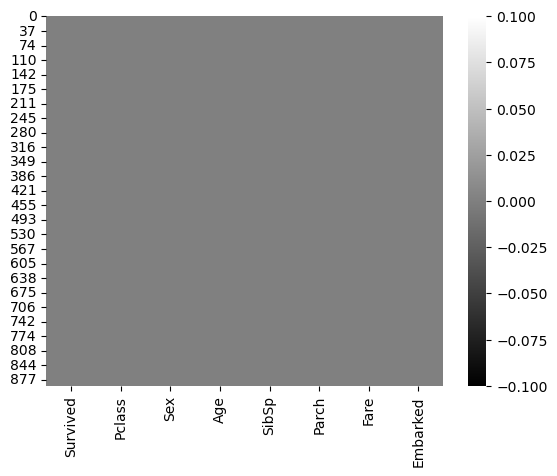

In [28]:
sns.heatmap(df1.isnull(), cmap='gist_yarg_r')

In [29]:
df1.shape

(712, 8)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [31]:
df1['Sex'].count()

712

In [32]:
df1['Sex'].unique()

array(['male', 'female'], dtype=object)

## Replace Method

In [33]:
gender = pd.get_dummies(df1['Sex'], drop_first=True)

In [34]:
gender

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [35]:
df1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [36]:
embarked = pd.get_dummies(df1['Embarked'], drop_first=True)

In [37]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
885,True,False
886,False,True
887,False,True
889,False,False


In [38]:
df2 = pd.concat([df1, gender, embarked], axis= 1)

In [39]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [40]:
df2.drop(['Sex','Embarked'],axis=1 , inplace= True )

In [41]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   male      712 non-null    bool   
 7   Q         712 non-null    bool   
 8   S         712 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 41.0 KB


In [43]:
df2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [44]:
df2.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.536762,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.150826,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.099037,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.106296,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.249543,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.182457,-0.062346,-0.250994
male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,1.000000,-0.027256,0.109078
Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,-0.062346,-0.027256,1.000000,-0.378859
S,-0.159015,0.197831,-0.025431,0.018968,0.013259,-0.250994,0.109078,-0.378859,1.000000


<Axes: >

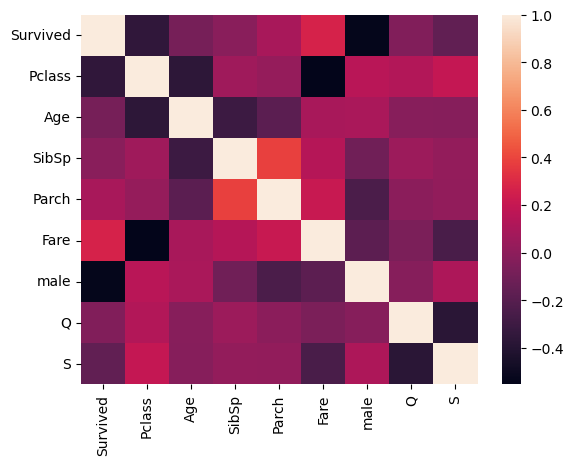

In [45]:
sns.heatmap(df2.corr())

### Devide a Data into Independent and Dependent Variable

In [46]:
x = df2.drop('Survived',axis=1)

In [47]:
y = df2['Survived']

In [48]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Devide a Indpendent and Dependent features in to Training and Testing Dataset

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=False)

In [51]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
867,1,31.0,0,0,50.4958,True,False,True
332,1,38.0,0,1,153.4625,True,False,True
20,2,35.0,0,0,26.0000,True,False,True
606,3,30.0,0,0,7.8958,True,False,True
379,3,19.0,0,0,7.7750,True,False,True


In [52]:
y_train.head()

867    0
332    0
20     0
606    0
379    0
Name: Survived, dtype: int64

In [53]:
y_test.head()

423    0
178    0
305    1
292    0
592    0
Name: Survived, dtype: int64

In [54]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
423,3,28.00,1,1,14.400,False,False,True
178,2,30.00,0,0,13.000,True,False,True
305,1,0.92,1,2,151.550,True,False,True
292,2,36.00,0,0,12.875,True,False,False
592,3,47.00,0,0,7.250,True,False,True


In [55]:
x_train.shape

(569, 8)

In [56]:
x_test.shape

(143, 8)

In [57]:
y_test.shape

(143,)

In [58]:
y_train.shape

(569,)

In [59]:
log_model = LogisticRegression()

In [60]:
log_model.fit(x_train, y_train)

C:\Users\shyam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predicted_op = log_model.predict(x_test)

In [62]:
print(predicted_op[:10])

[0 0 1 0 0 0 1 0 0 1]


In [63]:
print(y_test[:10])

423    0
178    0
305    1
292    0
592    0
595    0
472    1
54     0
456    0
111    0
Name: Survived, dtype: int64


### Classification and Confusion Matrix

In [64]:
print(confusion_matrix(y_test, predicted_op))

[[74  8]
 [18 43]]


<Axes: >

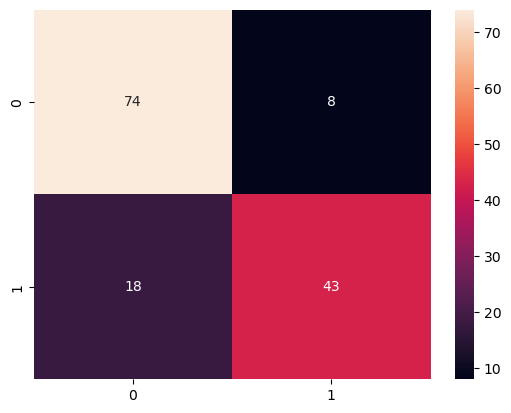

In [65]:
sns.heatmap(confusion_matrix(y_test, predicted_op),annot=True)

In [66]:
print(classification_report(y_test, predicted_op))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.84      0.70      0.77        61

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



In [67]:
print(accuracy_score(y_test, predicted_op) * 100)

81.81818181818183


## AUC-ROC Curve

In [68]:
y_predict = log_model.predict(x_test)

In [69]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [70]:
y_predict_prob_1 = log_model.predict_proba(x_test)

In [71]:
y_predict_prob_1 = y_predict_prob_1[:,1]

In [72]:
y_predict_prob_1[:10]

array([0.47003387, 0.25611839, 0.73558721, 0.29158631, 0.05427602,
       0.05610875, 0.68596727, 0.30000422, 0.21439469, 0.70440898])

In [73]:
y_test[:5]

423    0
178    0
305    1
292    0
592    0
Name: Survived, dtype: int64

In [74]:
y_predict[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_predict_prob_1)

In [76]:
roc_auc_score(y_test, y_predict_prob_1)

0.8776489404238305

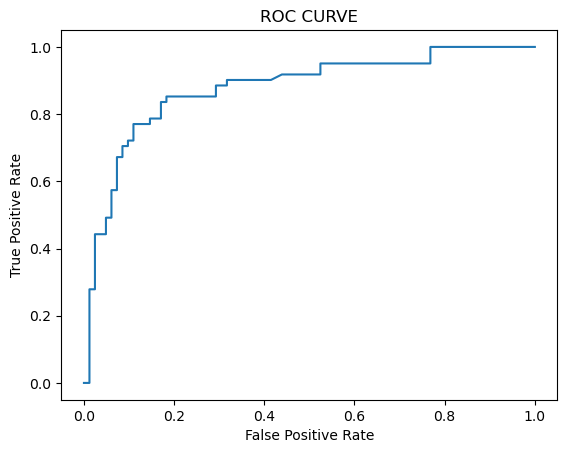

In [77]:
plt.title("ROC CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr)

**TPR / Recall / Sensitivity = TP / TP + FN**

In [78]:
74 / 92

0.8043478260869565

In [79]:
1 - 0.8043478260869565

0.19565217391304346

**Specificity / Precision  = TN / TN + FP**

In [80]:
43 / 51 

0.8431372549019608

**FPR = 1 - Specificity**

In [81]:
1 - 0.84

0.16000000000000003

**FPR = FP / FP + TN**

In [82]:
8 / 51

0.1568627450980392

In [83]:
0.8431372549019608 + 0.1568627450980392

1.0